This program studies the inflation scalar field with a quartic potential $V =  \lambda \phi^4$. We plot the inflation background and also the phase diagram of the evolution. The reheating process is also analyzed. 

We use cosmic time and e-folds, defined as $dN = H dt$. 

In [13]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from math import pi

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 12

Text(0.5, 1.0, 'Potential')

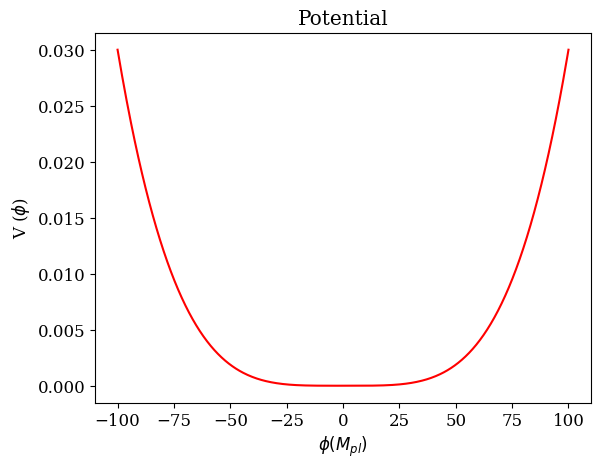

In [14]:
#Potencial of phi⁴
phi = np.linspace(-100,100,500)
lamb = 3e-10

V = lambda phi: lamb*np.power(phi,4)
dV = lambda phi: 4*lamb*np.power(phi,3)
c = 4*np.sqrt(lamb/3) #specific for the potential

#Figure for the potential given
fig_pot, ax_pot = plt.subplots()

ax_pot.plot(phi,V(phi),color='r', linestyle='-')
ax_pot.set_xlabel(r'$\phi (M_{pl})$')
ax_pot.set_ylabel(r'V ($\phi$)')
ax_pot.set_title('Potential')

Relevant parameters needed for inflation:

In [15]:
#slow-roll parameters
eps_v = lambda phi: 1/2*(dV(phi)/V(phi))*(dV(phi)/V(phi))
HSR_2 = lambda phi: V(phi)/3 #H in slow-roll

#relevant parameters
H_2 = lambda phi,dphi: 1/3*(1/2*dphi*dphi+V(phi)) #Complete H
H_2N = lambda phi,dphiN: V(phi)/(3-dphiN*dphiN/2) #respect e-folds
dH = lambda dphi: -1/2*dphi*dphi
eps = lambda phi,dphi: -dH(dphi)/H_2(phi,dphi)
epsN = lambda dphiN: dphiN*dphiN/2

#initial values for the slow-roll regime
phiSR_0 = 20
phiSR_e = 2*np.sqrt(2) #end of inflation
dphiSR_0 = -np.sqrt(2*eps_v(phiSR_0)*HSR_2(phiSR_0))
dphiNSR_0 = -np.sqrt(2*eps_v(phiSR_0))

The inflaton is described by the Klein-Gordon equation. In the slow-roll regime (SR) the equations can be simplified and an analitical solution for the inflaton with respect time can be obtained: $\phi (t) = \phi_0 \exp(-ct)$. 

To solve the KG equation need to be computed numerically. 

In [16]:
def kgNSR (t,phiN_arr): #KG for slow-roll regime (respect N)
    phiN, dphiN = phiN_arr

    y = dphiN
    y_der = (eps_v(phiN)-3)*y-3*np.sqrt(2*eps_v(phiN))
    
    return [y,y_der]

def kg (t,phi_arr): #complete KG (respect t)
    phi, dphi = phi_arr

    y = dphi
    y_der = -3*np.sqrt(H_2(phi,dphi))*y-dV(phi)

    return [y,y_der]

def kgN (t,phiN_arr): #complete KG (respect N)
    phiN, dphiN = phiN_arr

    y = dphiN
    y_der = -(3-epsN(dphiN))*y-(3-epsN(dphiN))*dV(phiN)/V(phiN)

    return [y,y_der]

def end_inflation (t,phiN_arr): #end of inflation
    phiN, dphiN = phiN_arr
    return phiN-phiSR_e
end_inflation.terminal = True
end_inflation.direction = -1

Firstly, we obtain the inflaton evolution in the slow-roll approximation with respect time and with respect e-folds. 

Text(0.5, 1.0, 'Slow-roll inflation (respect N)')

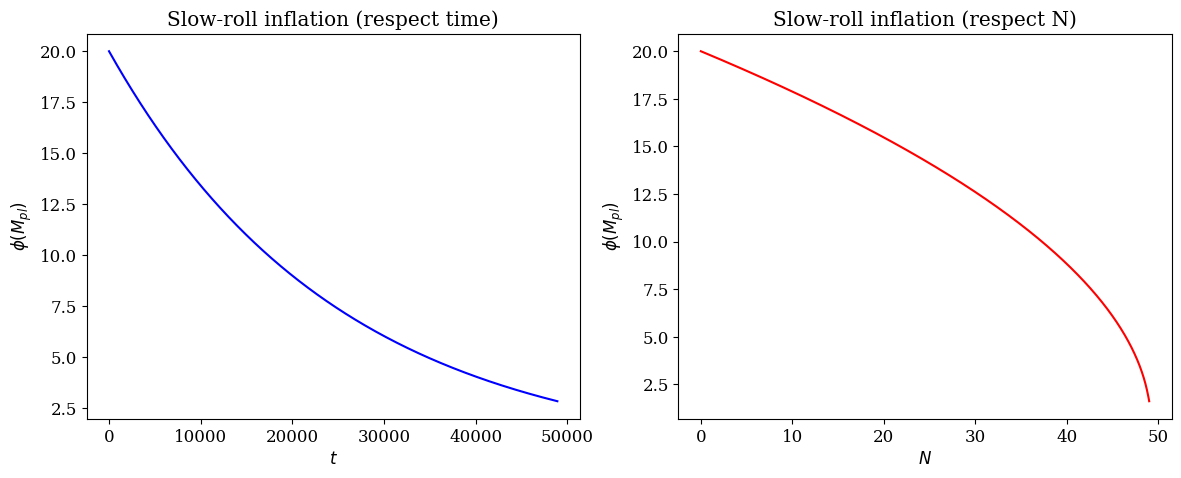

In [17]:
#slow-roll inflation
phiSR = np.linspace(phiSR_e,phiSR_0,1000)
dphiSR = -np.sqrt(2*eps_v(phiSR)*HSR_2(phiSR))

#with respect time
tSR = -1/c*np.log(phiSR/phiSR_0) #inverse solution of KG slow-roll
tSR_0 = tSR[-1]
tSR_end = tSR[0]

#with respect e-folds
NSR = (phiSR_0*phiSR_0-phiSR*phiSR)/8
N_span = np.array([NSR[-1],NSR[0]])
N_end = NSR[0]

phiN_arr_0 = [phiSR_0,dphiNSR_0]
NSR_eval = np.flip(NSR)

sol_SR = solve_ivp(kgNSR,N_span, phiN_arr_0, dense_output=True, events=end_inflation)
phiNSR = sol_SR.sol(NSR_eval)[0]
dphiNSR = sol_SR.sol(NSR_eval)[1]

#FIGURES
fig1 = plt.figure()
fig1.set_figheight(5)
fig1.set_figwidth(14)

#plot inflation during slow-roll (respect time)
ax1_time = plt.subplot(1,2,1)
ax1_time.plot(tSR,phiSR,color='b', linestyle='-')
ax1_time.set_xlabel(r'$t$')
ax1_time.set_ylabel(r'$\phi (M_{pl})$')
ax1_time.set_title('Slow-roll inflation (respect time)')

#plot inflation during slow-roll (respect N)
ax1_efolds = plt.subplot(1,2,2)
ax1_efolds.plot(NSR_eval,phiNSR,color='r', linestyle='-')
ax1_efolds.set_xlabel(r'$N$')
ax1_efolds.set_ylabel(r'$\phi (M_{pl})$')
ax1_efolds.set_title('Slow-roll inflation (respect N)')

The phase diagram of the evolution can also be plotted.

Text(0.5, 1.0, 'Phase Diagram (respect N)')

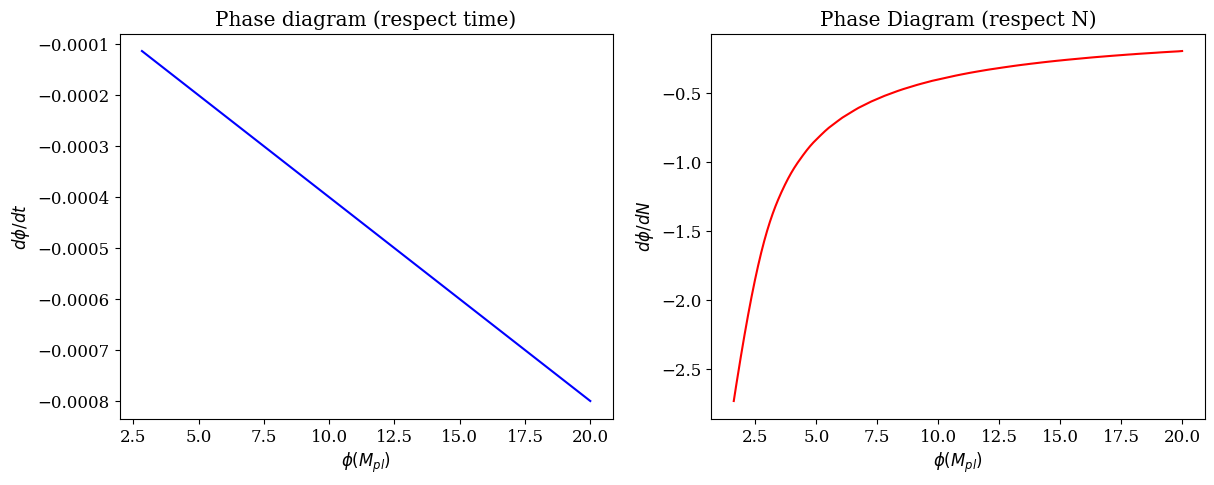

In [18]:
#FIGURES
fig11 = plt.figure()
fig11.set_figheight(5)
fig11.set_figwidth(14)

#phase diagram respect time
ax11_time = plt.subplot(1,2,1)
ax11_time.plot(phiSR,dphiSR,color='b', linestyle='-')
ax11_time.set_xlabel(r'$\phi (M_{pl})$')
ax11_time.set_ylabel(r'$d\phi/dt$')
ax11_time.set_title('Phase diagram (respect time)')

#phase diagram respect N
ax11_efolds = plt.subplot(1,2,2)
ax11_efolds.plot(phiNSR,dphiNSR,color='r', linestyle='-')
ax11_efolds.set_xlabel(r'$\phi (M_{pl})$')
ax11_efolds.set_ylabel(r'$d\phi/dN$')
ax11_efolds.set_title('Phase Diagram (respect N)')

As we have the complete equation for the inflaton evolution, let's compare the slow-roll regime and the exact solution. It is only done in the e-folds case. 

Text(0.5, 1.0, 'Phase diagram comparison')

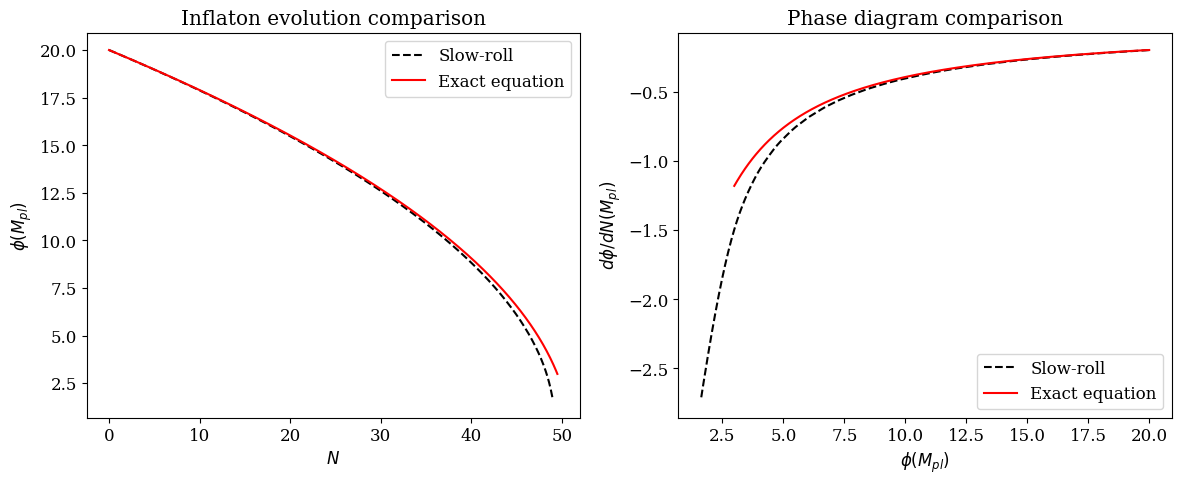

In [19]:
#numerical integration for complete KG
N_span = np.array([0,N_end+10])
N_eval = np.linspace(N_span[0],N_end+0.5,1000)

sol = solve_ivp(kgN,N_span, phiN_arr_0, dense_output=True, method='BDF', rtol=1e-10)
phiN = sol.sol(N_eval)[0]
dphiN = sol.sol(N_eval)[1]

#FIGURES
fig2 = plt.figure()
fig2.set_figheight(5)
fig2.set_figwidth(14)

#plot inflation comparison
ax2_comp = plt.subplot(1,2,1)
ax2_comp.plot(NSR_eval,phiNSR,color='k', linestyle='--', label='Slow-roll')
ax2_comp.plot(N_eval,phiN,color='r', linestyle='-', label='Exact equation')
ax2_comp.set_xlabel(r'$N$')
ax2_comp.set_ylabel(r'$\phi (M_{pl})$')
ax2_comp.legend()
ax2_comp.set_title('Inflaton evolution comparison')

#plot phase diagram comparison
ax2_ph = plt.subplot(1,2,2)
ax2_ph.plot(phiNSR,dphiNSR,color='k', linestyle='--', label='Slow-roll')
ax2_ph.plot(phiN,dphiN,color='r', linestyle='-', label='Exact equation')
ax2_ph.set_xlabel(r'$\phi (M_{pl})$')
ax2_ph.set_ylabel(r'$d\phi/dN (M_{pl})$')
ax2_ph.legend()
ax2_ph.set_title('Phase diagram comparison')

We want to see what happens with initial conditions different to the slow-roll regime, so we plot the phase diagram for various initial conditions.  

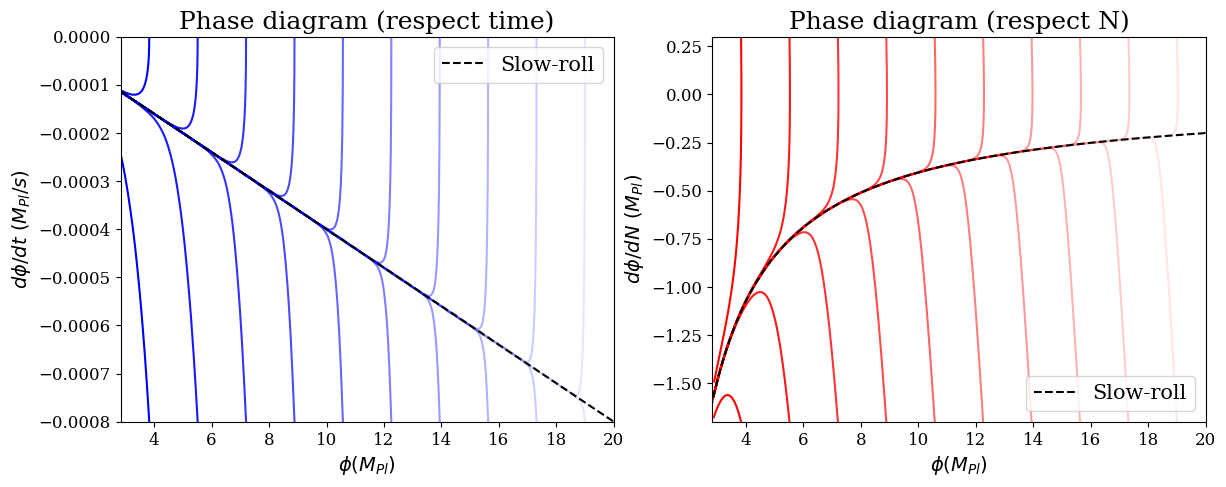

In [20]:
#initial conditions
phi_0 = np.linspace(phiSR_e+1,phiSR_0-1,10)
dphi_0 = [dphiSR_0,0]
dphiN_0 = [dphiNSR_0-1.5,dphiNSR_0+0.5]
t_0 = 0

#FIGURE PLOTS
fig3 = plt.figure()
fig3.set_figheight(5)
fig3.set_figwidth(14)
ax3_time = plt.subplot(1,2,1)
ax3_efolds = plt.subplot(1,2,2)

#numerical integration respect time
t_end = tSR_end
t_eval = np.linspace(t_0,t_end,1000)
t_span = np.array([t_0,t_end])

for i,phi_ini in enumerate(phi_0):
    for j in range(len(dphi_0)):
        phi_arr_0 = [phi_ini,dphi_0[j]]
        phiN_arr_0 = [phi_ini,dphiN_0[j]]

        var_alpha = 1.*(len(phi_0)-i)/len(phi_0)

        sol_t = solve_ivp(kg,t_span, phi_arr_0, t_eval=t_eval, events=end_inflation)
        sol_N = solve_ivp(kgNSR,N_span, phiN_arr_0, t_eval=N_eval, events=end_inflation)

        t = sol_t.t
        phi = sol_t.y[0]
        dphi = sol_t.y[1]

        N = sol_N.t
        phiN_ph = sol_N.y[0]
        dphiN_ph = sol_N.y[1]

        ax3_time.plot(phi,dphi,color='b', alpha=var_alpha, linestyle='-') #respect time
        ax3_efolds.plot(phiN_ph,dphiN_ph,color='r', alpha=var_alpha, linestyle='-')

#plot phase diagram respect time
ax3_time.plot(phiSR,dphiSR,color='k', linestyle='--', label='Slow-roll')
ax3_time.set_xlabel(r'$\phi(M_{Pl})$', size=14)
ax3_time.set_ylabel(r'$d\phi/dt \ (M_{Pl}/s)$', size=14)
ax3_time.set_xlim([phiSR_e,phiSR_0])
ax3_time.set_ylim([dphi_0[0],dphi_0[-1]])
ax3_time.legend(fontsize=15)
ax3_time.set_title('Phase diagram (respect time)', size=18)

#plot phase diagram respect e-folds
ax3_efolds.plot(phiNSR,dphiNSR,color='k', linestyle='--', label='Slow-roll')
ax3_efolds.set_xlabel(r'$\phi(M_{Pl})$', size=14)
ax3_efolds.set_ylabel(r'$d\phi/dN \ (M_{Pl})$', size=14)
ax3_efolds.set_xlim([phiSR_e,phiSR_0])
ax3_efolds.set_ylim([dphiN_0[0],dphiN_0[-1]])
ax3_efolds.legend(fontsize=15)
ax3_efolds.set_title('Phase diagram (respect N)',size=18)

fig3.savefig('Phase_Diagram.png') #used in the memory

The evolution after the inflation epoch can also be obtained. In this scenario, the slow-roll regime is no longer valid. 

Text(0.5, 1.0, 'Phase diagram (after inflation)')

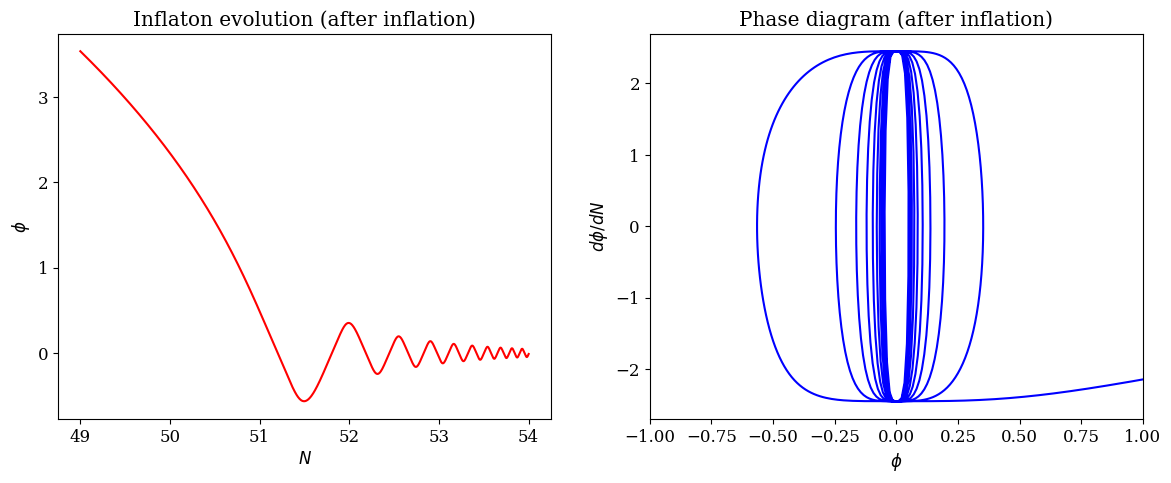

In [21]:
#conditions after inflation
N_aft = np.linspace(N_end,N_end+5,1000)

phiN_af = sol.sol(N_aft)[0]
dphiN_af = sol.sol(N_aft)[1]

#FIGURE PLOTS
fig4 = plt.figure()
fig4.set_figheight(5)
fig4.set_figwidth(14)

#plot inflation after inflation
ax4_time = plt.subplot(1,2,1)
ax4_time.plot(N_aft,phiN_af,color='r', linestyle='-')
ax4_time.set_xlabel(r'$N$')
ax4_time.set_ylabel(r'$\phi$')
ax4_time.set_title('Inflaton evolution (after inflation)')

#plot phase diagram
ax4_ph = plt.subplot(1,2,2)
ax4_ph.plot(phiN_af,dphiN_af,color='b', linestyle='-')
ax4_ph.set_xlabel(r'$\phi$')
ax4_ph.set_ylabel(r'$d\phi/dN$')
ax4_ph.set_xlim([-1,1])
ax4_ph.set_title('Phase diagram (after inflation)')

With the expressions of $\rho$ and $P$ of the inflation scalar field, it is useful to plot the equation of state: $w = P/\rho$. 

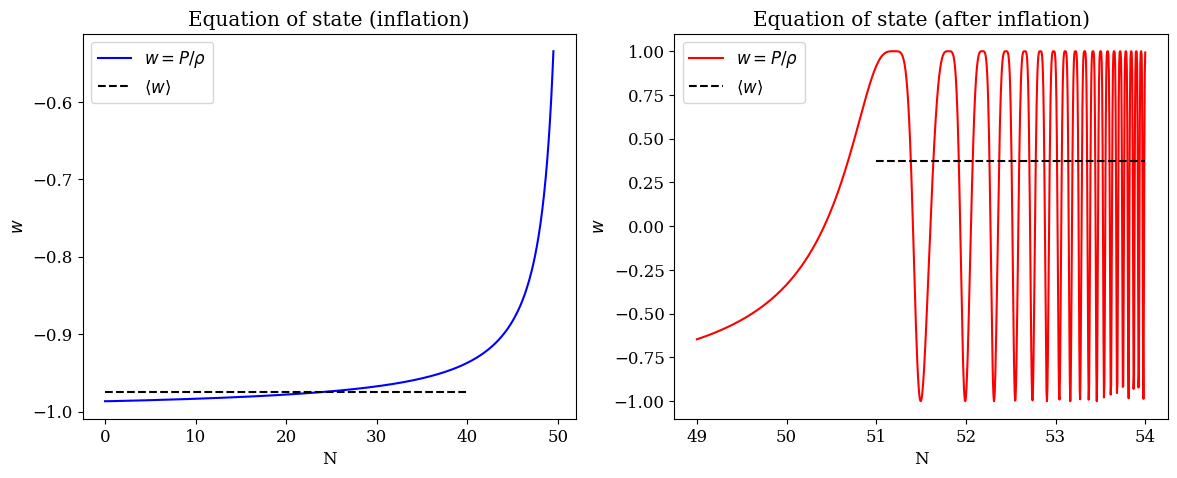

In [25]:
#pressure and density
rho = lambda phi,dphi: H_2N(phi,dphi)*dphi*dphi/2+V(phi)
pr = lambda phi,dphi: H_2N(phi,dphi)*dphi*dphi/2-V(phi)

#w for inflation
w = pr(phiN,dphiN)/rho(phiN,dphiN)
w_aft = pr(phiN_af,dphiN_af)/rho(phiN_af,dphiN_af)

#average value
N_av_end = 40
N_av = np.where(N_eval < N_av_end)
h = N_eval[1]-N_eval[0]
w_av = w[N_av]
w_av = sum(w_av*h)/N_av_end

N_aft_av_0 = 51
N_aft_av = np.where(N_aft>N_aft_av_0)
h_aft = N_aft[1]-N_aft[0]
w_aft_av = w_aft[N_aft_av]
w_aft_av = sum(w_aft_av*h_aft)/(N_aft[-1]-N_aft_av_0)

#Figure for the equation of state
fig_st = plt.figure()
fig_st.set_figheight(5)
fig_st.set_figwidth(14)

ax_phi = plt.subplot(1,2,1)
ax_aft = plt.subplot(1,2,2)

ax_phi.plot(N_eval,w,color='b', linestyle='-', label=r'$w=P/\rho$')
ax_phi.plot(N_eval[N_av],w_av*np.ones(len(N_eval[N_av])), color='k', linestyle='--', label=r'$\langle w \rangle$')
ax_phi.set_xlabel(r'N')
ax_phi.set_ylabel(r'$w$')
ax_phi.set_title('Equation of state (inflation)')
ax_phi.legend()

ax_aft.plot(N_aft,w_aft,color='r', linestyle='-',label=r'$w=P/\rho$')
ax_aft.plot(N_aft[N_aft_av],w_aft_av*np.ones(len(N_aft[N_aft_av])), color='k', linestyle='--', label=r'$\langle w \rangle$')
ax_aft.set_xlabel(r'N')
ax_aft.set_ylabel(r'$w$')
ax_aft.set_title('Equation of state (after inflation)')
ax_aft.legend()

Final plots for the reheating process.

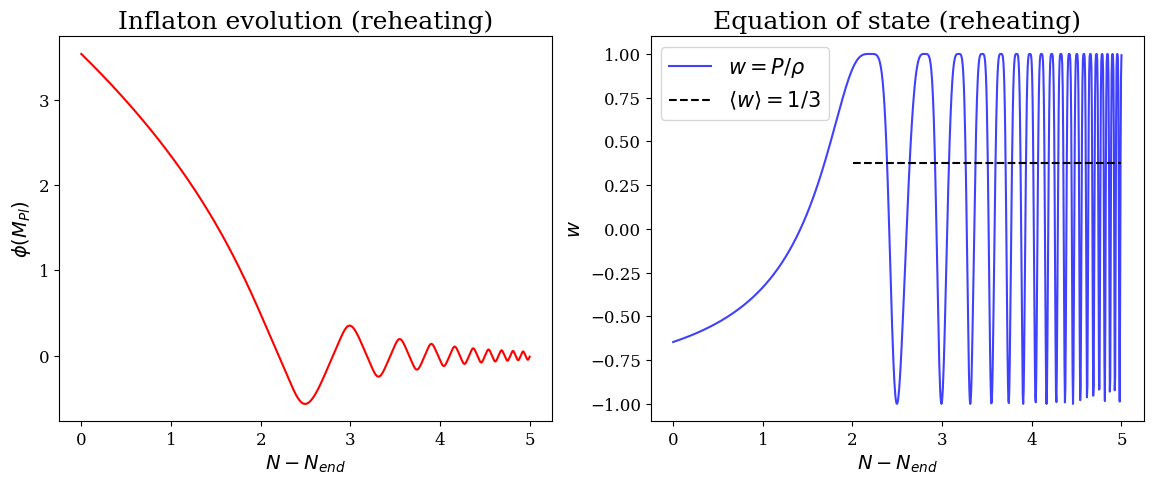

In [23]:
N_reh = N_aft-N_end

#Figure for reheating
fig_reh = plt.figure()
fig_reh.set_figheight(5)
fig_reh.set_figwidth(14)

ax_reh = plt.subplot(1,2,1)
ax_aft = plt.subplot(1,2,2)

ax_reh.plot(N_reh,phiN_af,color='r', linestyle='-')
ax_reh.set_xlabel(r'$N-N_{end}$', size=14)
ax_reh.set_ylabel(r'$\phi (M_{Pl})$', size=14)
ax_reh.set_title('Inflaton evolution (reheating)', size=18)

#plot equation of state
ax_aft.plot(N_reh,w_aft,color='b', alpha=0.75, linestyle='-',label=r'$w=P/\rho$')
ax_aft.plot(N_aft[N_aft_av]-N_end,w_aft_av*np.ones(len(N_aft[N_aft_av])), color='k', linestyle='--', label=r'$\langle w \rangle = 1/3$')
ax_aft.set_xlabel(r'$N-N_{end}$', size=14)
ax_aft.set_ylabel(r'$w$', size=14)
ax_aft.legend(fontsize=15)
ax_aft.set_title('Equation of state (reheating)',size=18)

fig_reh.savefig('Reheating_Quartic.png') #used in the memory